In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import iso8601

## Parsing the file
We first have to parse the file containing daily weather data.

The format used is essentially a CSV file with a large multi-line header.
The last line of the header starts with a `#`. 
We are only interested in maximum and minimum temperatures, and the date. 
Temperatures are denoted in 0.1 degrees Celcius. 

In [2]:
def parse_etmgeg_to_df(path):
    """
    Parse an 'etmgeg' file to a pandas dataframe.
    We are - currently - only interested in minimum
    and maximum temperatures. 
    """
    t_max = []
    t_min = []
    dates = []
    with open(path, "rb") as handle:
        header_seen = False
        for line in handle:
            if header_seen: # data only starts after a header
                cont = line.strip().split(b",")
                if len(cont) == 1: # header is folowed by emtpy line
                    continue
                t_min.append(int(cont[12].strip()))
                t_max.append(int(cont[14].strip()))
                dates.append(iso8601.parse_date(cont[1].strip().decode('utf-8')))
            if line.strip().startswith(b"#"):
                header_seen=True
    df = pd.DataFrame.from_dict({
        "t_min": t_min,
        "t_max": t_max,
        "date": dates,
        "year": [x.year for x in dates]
    })
    return df

In [3]:
data = parse_etmgeg_to_df("../data/etmgeg_260.txt")

## Stats

Now we'll calculate some statistics by year. 

In [4]:
def stats_by_year(df):
    """
    Calculate some aggregate stats by year 
    """
    years = sorted(set(df.year))
    n_df = pd.DataFrame.from_dict({"year": years})
    methods = (
        (np.mean, "mean"),
        (np.median, "median"),
        (np.std, "std"),
        (lambda x: sum([z < 0.0 for z in x]) , "frost"),
        (lambda x: sum([z > 250.0 for z in x]), "warm"),
        (lambda x: sum([z > 300.0 for z in x]), "tropical")
    )
    for method, name in methods:
        m_max = []
        m_min = []
        for yr in years:
            sub = df.loc[df.year == yr]
            m_max.append(method(sub.t_max))
            m_min.append(method(sub.t_min))
        n_df['max_{0}'.format(name)] = m_max
        n_df['min_{0}'.format(name)] = m_min
    return n_df
        

In [5]:
stats = stats_by_year(data)

In [6]:
stats

,year,max_mean,min_mean,max_median,min_median,max_std,min_std,max_frost,min_frost,max_warm,min_warm,max_tropical,min_tropical
0,1901,129.731507,44.298630,130.0,52.0,79.165332,61.008790,18,85,16,0,1,0
1,1902,124.013699,39.430137,120.0,47.0,69.540506,55.799629,14,84,10,0,1,0
2,1903,130.309589,50.923288,128.0,56.0,66.778965,48.859762,11,66,12,0,0,0
3,1904,129.163934,45.625683,128.0,48.0,70.965784,50.175204,11,77,16,0,2,0
4,1905,125.802740,46.597260,116.0,44.0,71.900879,55.155864,6,79,11,0,0,0
5,1906,131.742466,49.556164,133.0,53.0,70.512523,56.033358,9,76,9,0,0,0
6,1907,126.561644,43.380822,134.0,47.0,66.147404,53.276484,14,76,3,0,0,0
7,1908,125.491803,41.592896,124.5,44.5,75.197581,61.833249,17,88,9,0,0,0
8,1909,123.742466,41.142466,134.0,47.0,66.578366,56.803304,5,103,6,0,0,0
9,1910,134.191781,53.063014,130.0,53.0,60.931594,50.720279,0,65,6,0,0,0


## Average temperature

Here we'll plot the average maximum temperature and average minimum temperature per year.
We'll also include moving averages for both sets. 

Temperatures are denoted in 0.1 degrees Celcius

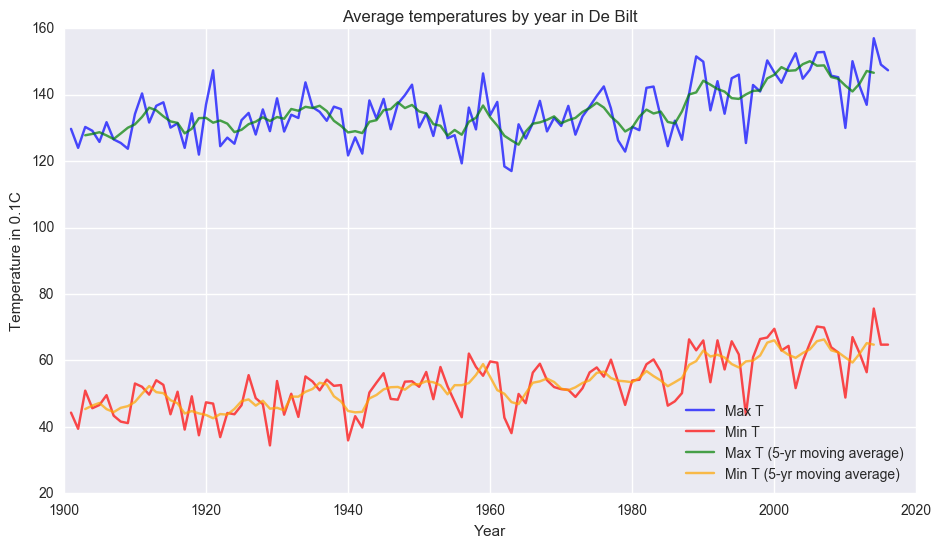

In [7]:
fig = plt.figure(figsize=(11,6))
ax  = plt.subplot(111)
ax.plot(stats.year, stats.max_mean, color='b', label="Max T", alpha=0.7)
ax.plot(stats.year, stats.min_mean, color="r", label="Min T", alpha=0.7)
rol = stats.rolling(window=5).mean()
ax.plot(rol.year, rol.max_mean, color='g', label="Max T (5-yr moving average)", alpha=0.7)
ax.plot(rol.year, rol.min_mean, color='orange', label="Min T (5-yr moving average)", alpha=0.7)
ax.legend(loc="lower right")
ax.set_title("Average temperatures by year in De Bilt")
ax.set_ylabel("Temperature in 0.1C")
ax.set_xlabel("Year")
plt.savefig("../img/avg_temp.png", dpi=300)

## Ice and frost days

Days with a minimum temperature below 0C are considered _frost days_.
Days with a maximum temperature below 0C are considered _ice days_. 

Here we'll plot the number of ice and frost days per year, as well as moving averages.

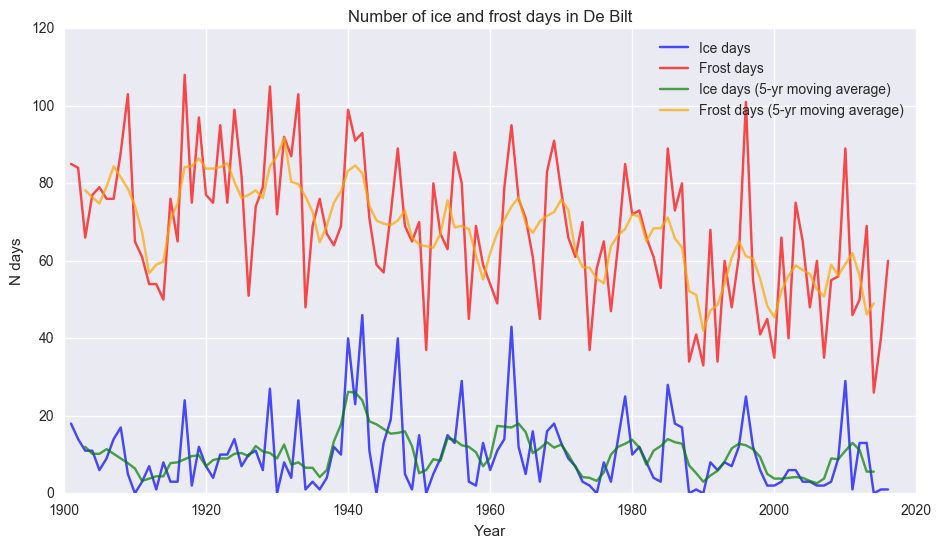

In [8]:
fig = plt.figure(figsize=(11,6))
ax  = plt.subplot(111)
ax.plot(stats.year, stats.max_frost, color='b', label="Ice days", alpha=0.7)
ax.plot(stats.year, stats.min_frost, color="r", label="Frost days", alpha=0.7)
rol = stats.rolling(window=5).mean()
ax.plot(rol.year, rol.max_frost, color='g', label="Ice days (5-yr moving average)", alpha=0.7)
ax.plot(rol.year, rol.min_frost, color='orange', label="Frost days (5-yr moving average)", alpha=0.7)
ax.legend(loc="upper right")
ax.set_title("Number of ice and frost days in De Bilt")
ax.set_ylabel("N days")
ax.set_xlabel("Year")
plt.savefig("../img/ice_and_frost.png", dpi=300)

## Warm and tropical days

Days with a maximum temperature above 25C are considered _warm days_.
Days with a maximum temperature above 30C are considered _tropical days_.

Here we'll plot the number of warm and tropical days per year, as well as moving averages.

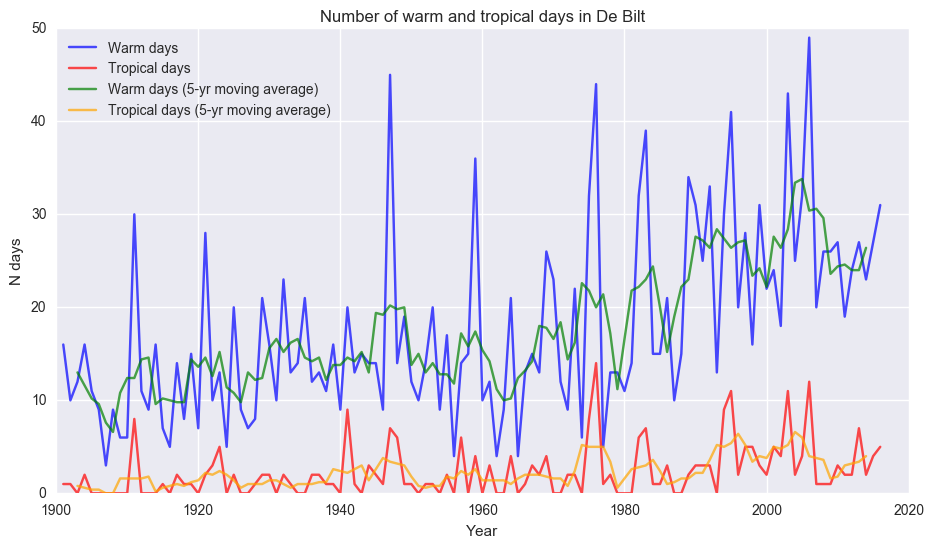

In [9]:
fig = plt.figure(figsize=(11,6))
ax  = plt.subplot(111)
ax.plot(stats.year, stats.max_warm, color='b', label="Warm days", alpha=0.7)
ax.plot(stats.year, stats.max_tropical, color="r", label="Tropical days", alpha=0.7)
rol = stats.rolling(window=5).mean()
ax.plot(rol.year, rol.max_warm, color='g', label="Warm days (5-yr moving average)", alpha=0.7)
ax.plot(rol.year, rol.max_tropical, color='orange', label="Tropical days (5-yr moving average)", alpha=0.7)
ax.legend(loc="upper left")
ax.set_title("Number of warm and tropical days in De Bilt")
ax.set_ylabel("N days")
ax.set_xlabel("Year")
plt.savefig("../img/warm_and_tropical.png", dpi=300)

##  Distributions per year

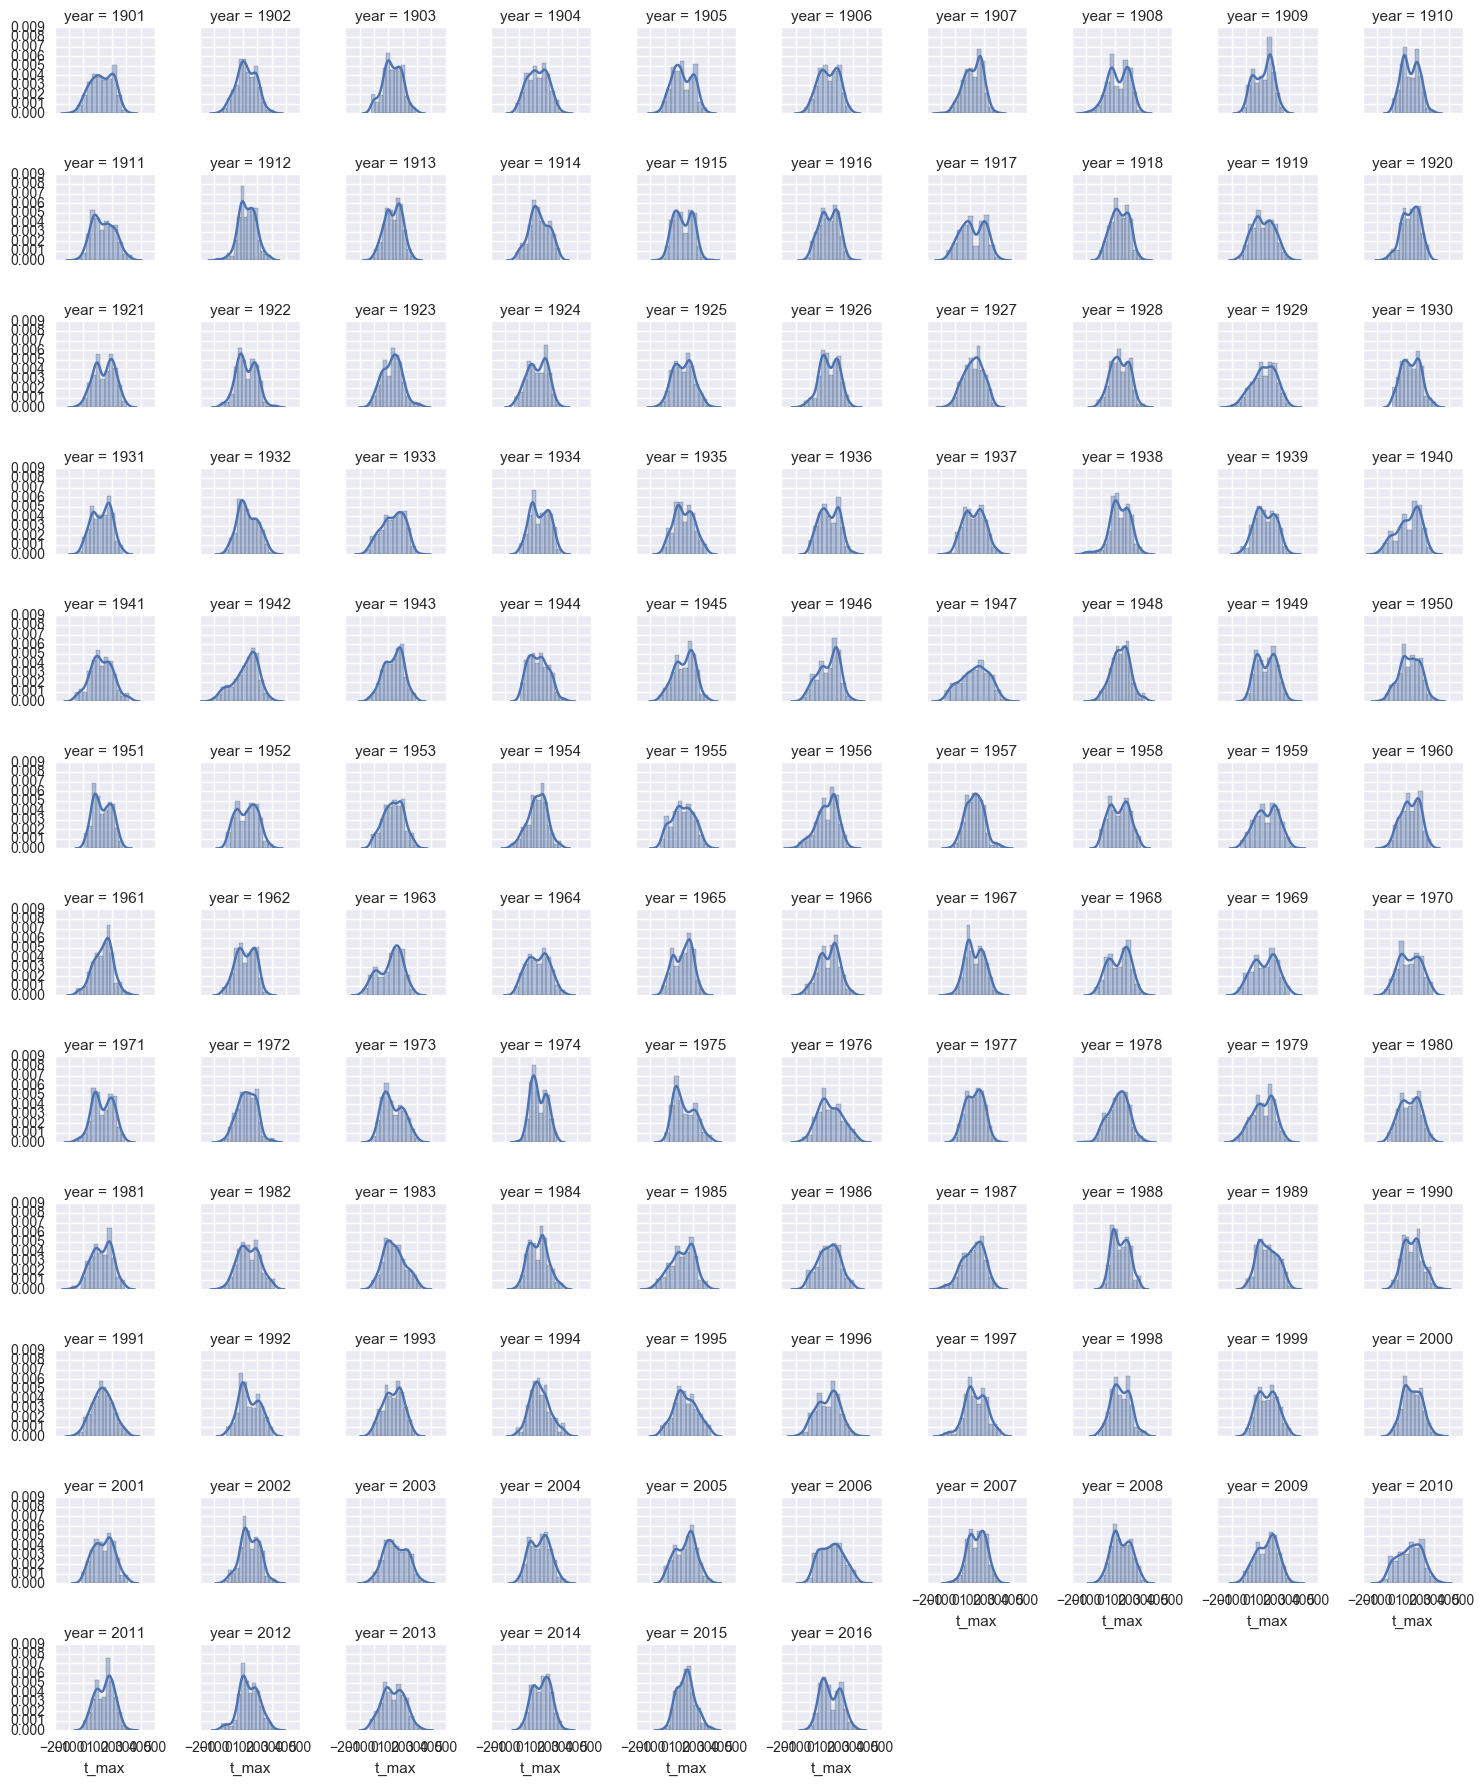

In [10]:
g = sns.FacetGrid(data, col="year", col_wrap=10, size=1.5)
g.map(sns.distplot, "t_max")

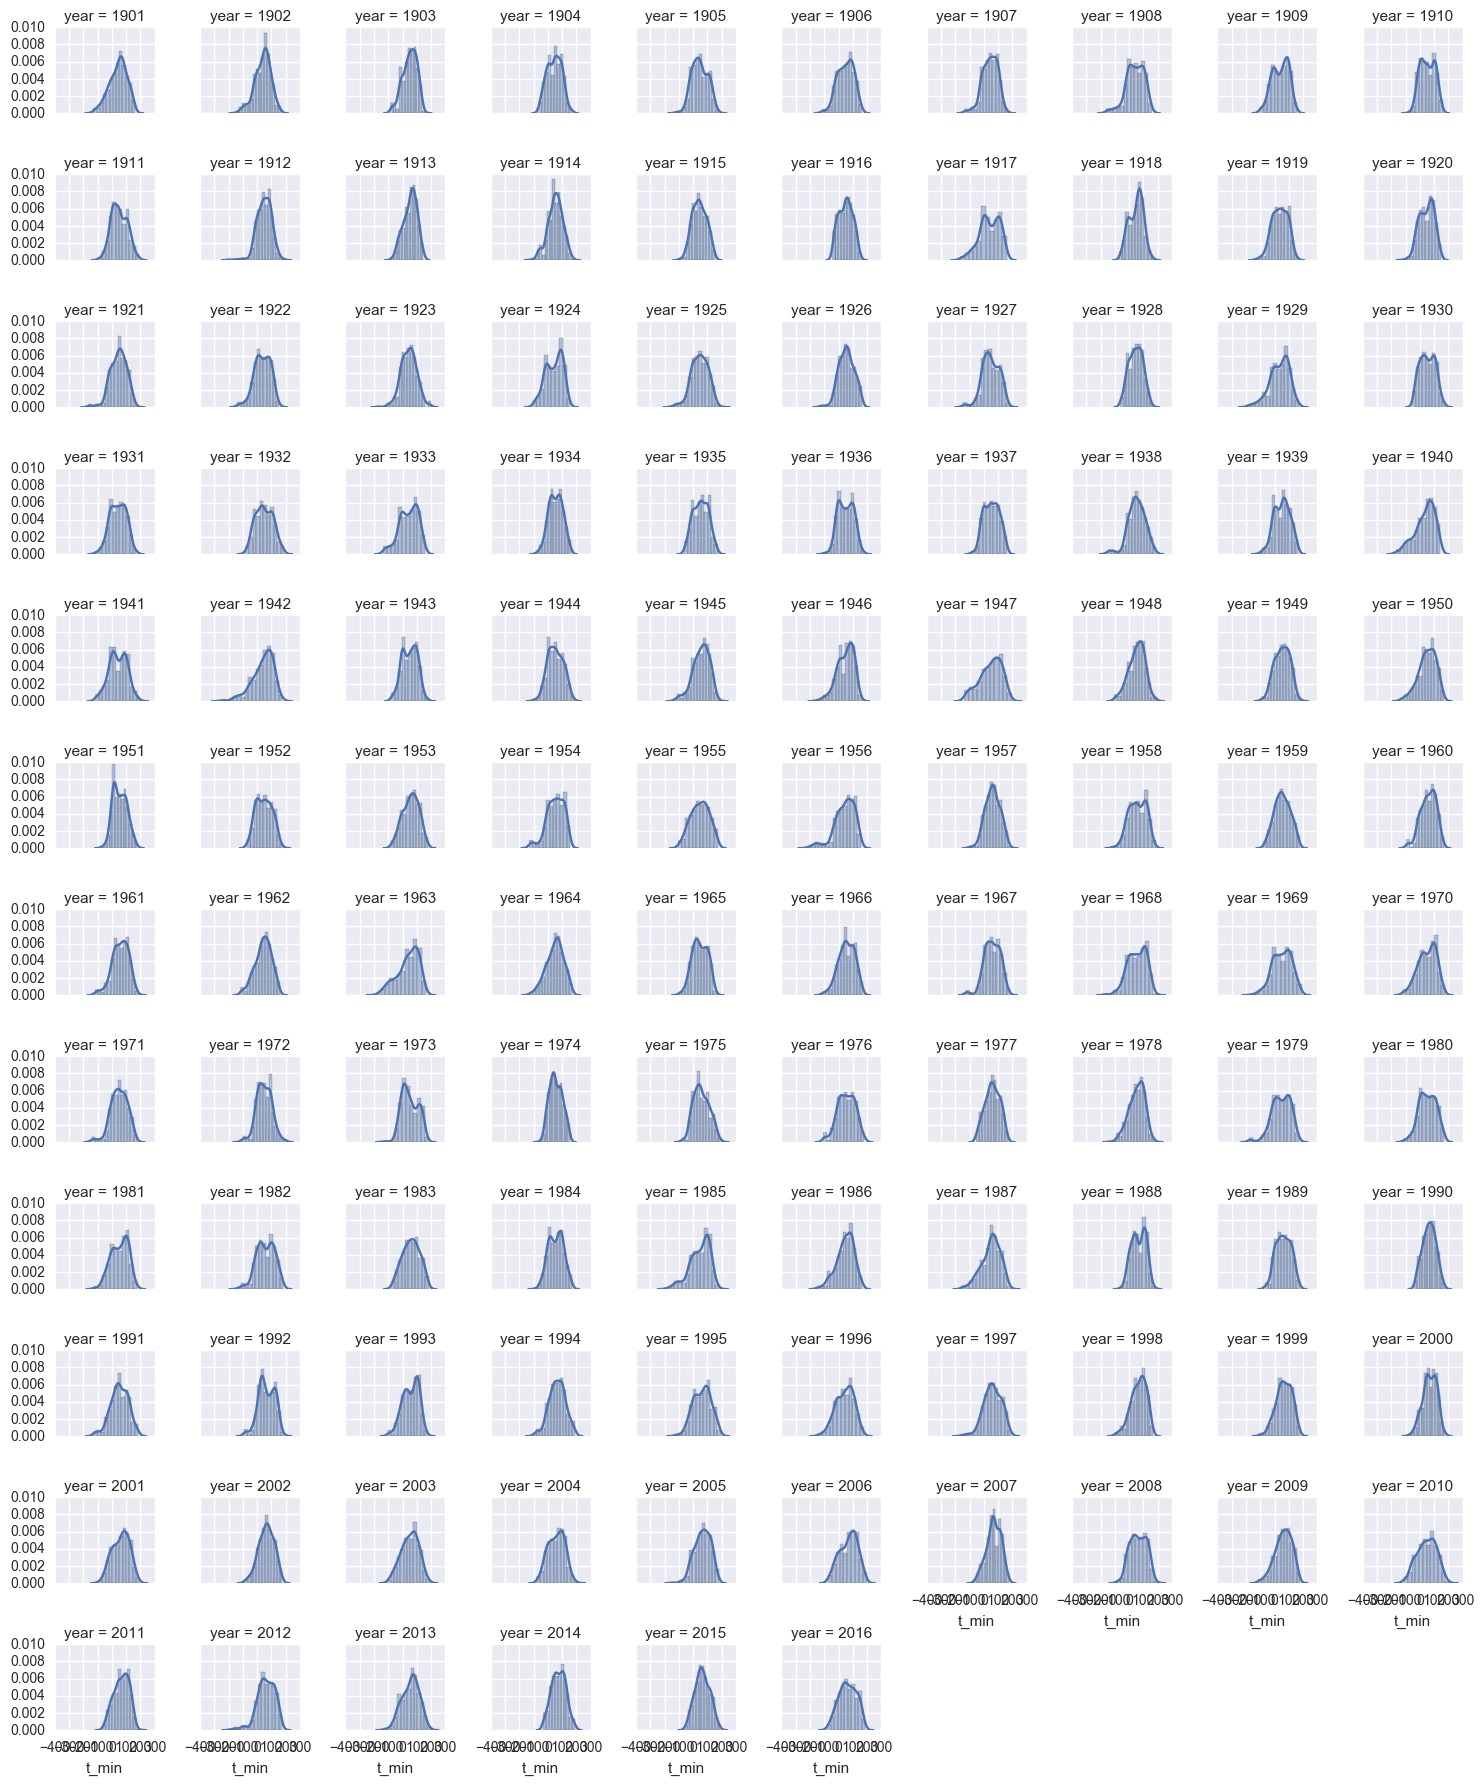

In [11]:
g = sns.FacetGrid(data, col="year", col_wrap=10, size=1.5)
g.map(sns.distplot, "t_min")